In [2]:
from preprocess import *

from commonfunctions import *
import cv2
import skimage.filters as filters
import scipy.ndimage as nd
%matplotlib inline
%load_ext autoreload
%autoreload 2



In [40]:
from skimage import img_as_uint


In [73]:
# img = io.imread('fonts-dataset/Lemonada/4.jpeg')
from preprocess import *

import os
from skimage import img_as_uint
from tqdm import tqdm
fontName='Lemonada'
dir=os.path.join('fonts-dataset',fontName)
outdir=os.path.join('out',fontName)
images= os.listdir(dir)
for imgname in tqdm(images):
    print(f"processing {imgname}")
    img = io.imread(os.path.join(dir,imgname))
    img=preprocess(img)
    rot=removeSkew(img)
    rot= cropImage(rot)
    imtosave=img_as_uint(rot)
    imgname=imgname.replace('.jpeg','.png')
    io.imsave(os.path.join(outdir,imgname),imtosave)
# img=preprocess(img)
# rot=removeSkew(img)
# show_images([rot], ['Rotated Image'])

# print(rot.shape)
# #take 415 pixel around the center
# center=rot.shape[1]//2
# print(center)
# rot=rot[center-415:center+415,center-415:center+415]
# show_images([rot], ['Cropped Image'])
#print type of numpy element 
# print(img.dtype)
# vertical_hist = np.sum(img,axis=0,keepdims=True)
# horizontal_hist = np.sum(img,axis=1,keepdims=True)
# print(horizontal_hist.shape)
# plot vertical_hist to see the peaks
# plt.plot(horizontal_hist.T[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

processing 0.jpeg


  0%|          | 1/1000 [00:00<11:54,  1.40it/s]

(500, 500)
processing 1.jpeg


  0%|          | 2/1000 [00:01<14:32,  1.14it/s]

(500, 500)
processing 10.jpeg


  0%|          | 3/1000 [00:02<13:16,  1.25it/s]

(500, 500)
processing 100.jpeg


  0%|          | 4/1000 [00:03<12:32,  1.32it/s]

(500, 500)
processing 101.jpeg


  0%|          | 5/1000 [00:03<12:29,  1.33it/s]

(500, 500)
processing 102.jpeg


  1%|          | 6/1000 [00:04<11:54,  1.39it/s]

(500, 500)
processing 103.jpeg


  1%|          | 7/1000 [00:05<13:39,  1.21it/s]

(500, 500)
processing 104.jpeg


  1%|          | 8/1000 [00:06<12:27,  1.33it/s]

(500, 500)
processing 105.jpeg


  1%|          | 9/1000 [00:07<13:21,  1.24it/s]

(500, 500)
processing 106.jpeg


  1%|          | 10/1000 [00:07<13:38,  1.21it/s]

(500, 500)
processing 107.jpeg


  1%|          | 11/1000 [00:08<12:37,  1.30it/s]

(500, 500)
processing 108.jpeg


  1%|          | 12/1000 [00:09<11:39,  1.41it/s]

(500, 500)
processing 109.jpeg


  1%|▏         | 13/1000 [00:09<11:59,  1.37it/s]

(500, 500)
processing 11.jpeg


  1%|▏         | 14/1000 [00:10<12:09,  1.35it/s]

(500, 500)
processing 110.jpeg


  2%|▏         | 15/1000 [00:11<11:25,  1.44it/s]

(500, 500)
processing 111.jpeg


  2%|▏         | 16/1000 [00:12<11:39,  1.41it/s]

(500, 500)
processing 112.jpeg


  2%|▏         | 17/1000 [00:12<11:01,  1.49it/s]

(500, 500)
processing 113.jpeg


  2%|▏         | 18/1000 [00:13<12:16,  1.33it/s]

(500, 500)
processing 114.jpeg


  2%|▏         | 19/1000 [00:14<13:08,  1.24it/s]

(500, 500)
processing 115.jpeg


  2%|▏         | 20/1000 [00:15<14:18,  1.14it/s]

(500, 500)
processing 116.jpeg


  2%|▏         | 21/1000 [00:16<14:58,  1.09it/s]

(500, 500)
processing 117.jpeg


  2%|▏         | 22/1000 [00:17<13:15,  1.23it/s]

(500, 500)
processing 118.jpeg


  2%|▏         | 23/1000 [00:17<12:45,  1.28it/s]

(500, 500)
processing 119.jpeg


  2%|▏         | 24/1000 [00:18<12:20,  1.32it/s]

(500, 500)
processing 12.jpeg


  2%|▎         | 25/1000 [00:19<12:21,  1.31it/s]

(500, 500)
processing 120.jpeg


  3%|▎         | 26/1000 [00:20<13:52,  1.17it/s]

(500, 500)
processing 121.jpeg


  3%|▎         | 27/1000 [00:21<13:57,  1.16it/s]

(500, 500)
processing 122.jpeg


  3%|▎         | 27/1000 [00:22<13:16,  1.22it/s]


KeyboardInterrupt: 

853
(830, 830)


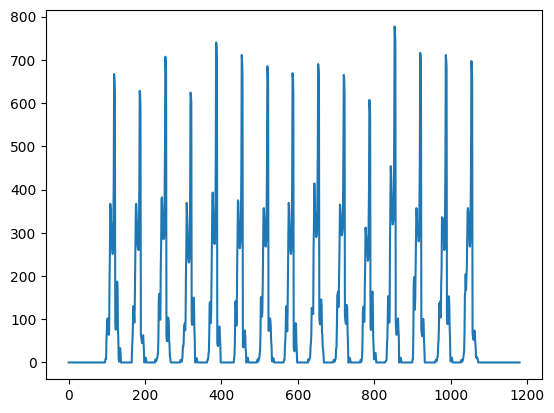

In [64]:
img = io.imread('fonts-dataset/Lemonada/1.jpeg')
img=preprocess(img)
rot=removeSkew(img)
center=rot.shape[1]//2
# make the center dynamic according to highest peak in horizontal histogram
horizontal_hist = np.sum(rot,axis=1,keepdims=True)
center=np.argmax(horizontal_hist)
plt.plot(horizontal_hist.T[0])
print(center)
if center <415:
    rot=rot[0:415*2,0:415*2]
elif center > rot.shape[1]-415:
    rot=rot[-415*2:, -415*2:]
else:
    print(center-415)
    print(center+415)
    print(rot.shape)
    rot=rot[center-415:center+415,center-415:center+415]
# print(rot.shape)
#plot the histogram to see the peaks

In [8]:
from skimage.feature  import *
radius = 3
n_points = 8 * radius
# glcm = graycomatrix(rot,[5],[0])
# get lbp of the image
lbp = local_binary_pattern(rot, n_points, radius, 'uniform')

# print(rot.shape)
# print(glcm)
print(lbp.shape)

(1181, 1181)
